In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading dataset
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Making passenger id as index
data.set_index('PassengerId',inplace=True)

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
#Basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#rows and columns in dataset
data.shape

(891, 11)

In [8]:
#columns names in the dataset
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#null values in dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age,cabin and embarkded columns have null values

In [10]:
#Replacing the null values of Embarked with Mode value
data['Embarked']=data['Embarked'].fillna(data["Embarked"].mode()[0])

In [11]:
#Finding Unique values in Cabin
data.Cabin.nunique()

147

Since more than half of the values are null and the most of the remaining are unique values,we can drop Cabin

In [13]:
data= data.drop('Cabin', axis=1)

In [14]:
#Filling the null values of Age with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [15]:
#Checking if all null values are filled
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
data=data.drop(['Name', 'Embarked','Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


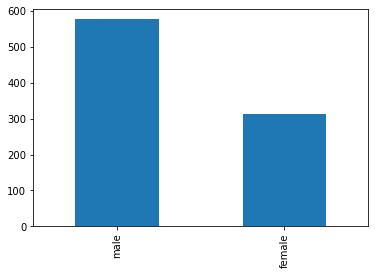

In [17]:
data.Sex.value_counts().plot(kind='bar')
plt.show()

From the above bargraph, we can see that majority are males

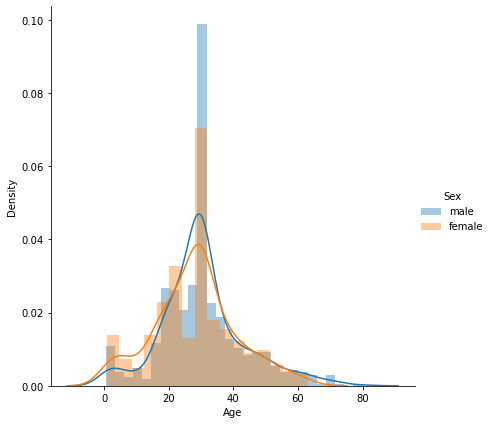

In [18]:
sns.FacetGrid(data, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

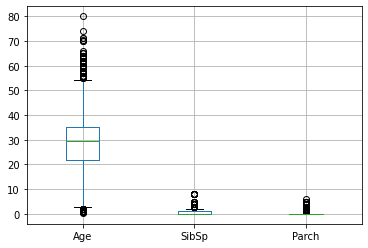

In [19]:
#Checking Outliers
boxplot = data.boxplot(column=['Age', 'SibSp', 'Parch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6d9283880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6d9283e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6d92835b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6d9290400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6d92906d0>],
 'means': []}

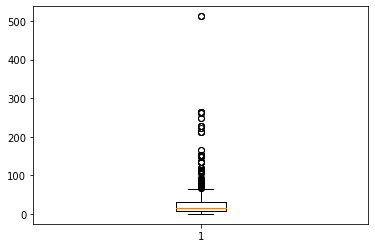

In [20]:
plt.boxplot(data['Fare'])

From the above boxplot we have concluded that age,sibsp,Fare and parch have outliers

In [21]:
#Removing outliers from Fare
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1

#lower and Upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(" Q1=",Q1,', Q2=',Q2,', Q3=',Q3," IQR=",IQR," lower limit is",low_lim,", Upper limit is",up_lim,)

 Q1= 7.9104 , Q2= 14.4542 , Q3= 31.0  IQR= 23.0896  lower limit is -26.724 , Upper limit is 65.6344


In [22]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [23]:
ind1=data['Fare']>up_lim
ind_new=data.loc[ind1].index

In [24]:
for i in ind_new:
    data.drop([i],inplace=True)

In [25]:
#Removing outliers from SibSp
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1

#lower and Upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(" Q1=",Q1,', Q2=',Q2,', Q3=',Q3," IQR=",IQR," lower limit is",low_lim,", Upper limit is",up_lim,)

 Q1= 0.0 , Q2= 0.0 , Q3= 1.0  IQR= 1.0  lower limit is -1.5 , Upper limit is 2.5


In [26]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [27]:
ind2=(data['SibSp']>up_lim)
ind_new1=data.loc[ind2].index

In [28]:
for i in ind_new1:
    data.drop([i],inplace=True)

In [29]:
#Removing outliers from Age
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1

#lower and Upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(" Q1=",Q1,', Q2=',Q2,', Q3=',Q3," IQR=",IQR," lower limit is",low_lim,", Upper limit is",up_lim,)

 Q1= 23.0 , Q2= 29.69911764705882 , Q3= 34.25  IQR= 11.25  lower limit is 6.125 , Upper limit is 51.125


In [30]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [31]:
ind2=(data['Age']>up_lim)
ind_new1=data.loc[ind2].index

In [32]:
for i in ind_new1:
    data.drop([i],inplace=True)

In [33]:
ind3=(data['Age']<low_lim)
ind_new2=data.loc[ind3].index
for i in ind_new2:
    data.drop([i],inplace=True)

<AxesSubplot:>

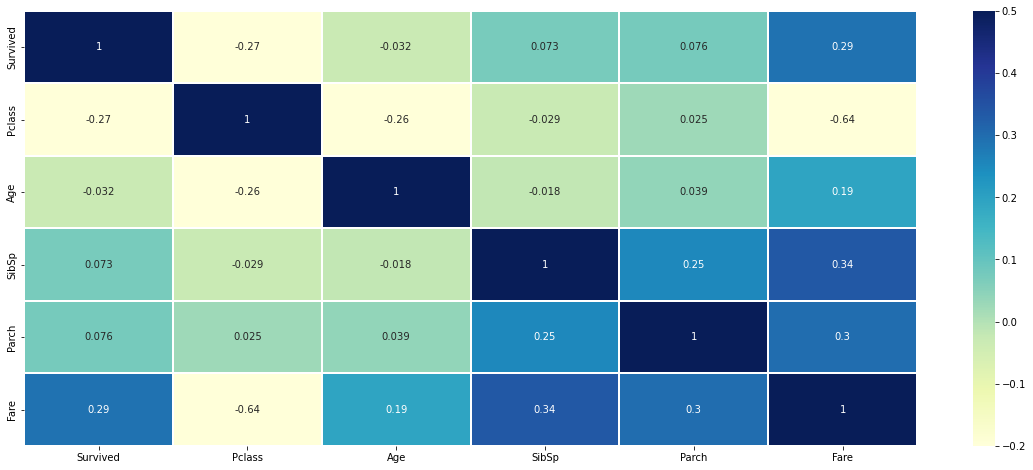

In [34]:
#Plotting Heatmap
corr=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=-.2,vmax=0.5,annot=True,linewidth=0.2,cmap='YlGnBu')

In [35]:
#Label Encoding
from sklearn import preprocessing
lab_e = preprocessing.LabelEncoder()
data['Sex']= lab_e.fit_transform(data['Sex'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.000000,1,0,7.2500
3,1,3,0,26.000000,0,0,7.9250
4,1,1,0,35.000000,1,0,53.1000
5,0,3,1,35.000000,0,0,8.0500
6,0,3,1,29.699118,0,0,8.4583
...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000
888,1,1,0,19.000000,0,0,30.0000
889,0,3,0,29.699118,1,2,23.4500


In [36]:
# min max scaling

In [37]:
from sklearn import preprocessing

In [38]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_data= min_max.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.328336,0.751124,0.694153,0.507035,0.129685,0.042729,0.253975
std,0.469960,0.361816,0.461111,0.192675,0.243634,0.125089,0.205045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.386364,0.000000,0.000000,0.120834
50%,0.000000,1.000000,1.000000,0.515889,0.000000,0.000000,0.161538
75%,1.000000,1.000000,1.000000,0.590909,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [39]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [40]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression

In [41]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction= model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,prediction))

from sklearn.metrics import r2_score
print('R squared value is',r2_score(y_test,prediction))

MSE is 0.17168219825241005
R squared value is 0.24609304186346925


# LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
pred= log_model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred,average='micro'),4))

accuracy is:  0.7761
Precision is:  0.7761
recall score is:  0.7761
f1 score is:  0.7761


In [44]:
confusion_matrix(y_test,pred)

array([[75, 12],
       [18, 29]])

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix

In [46]:
acc_values=[]
neighbors= np.arange(3,20)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [47]:
acc_values

[0.6865671641791045,
 0.664179104477612,
 0.6567164179104478,
 0.6716417910447762,
 0.6865671641791045,
 0.6716417910447762,
 0.6567164179104478,
 0.6716417910447762,
 0.664179104477612,
 0.664179104477612,
 0.6716417910447762,
 0.7164179104477612,
 0.7089552238805971,
 0.7089552238805971,
 0.6940298507462687,
 0.6865671641791045,
 0.6791044776119403]

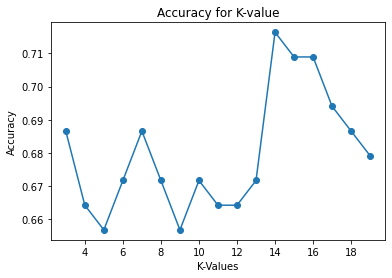

In [48]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [49]:
classifier= KNeighborsClassifier(n_neighbors=14,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [50]:
print('accuracy is: ',round(accuracy_score(y_test,y_predict),4))
print('Precision is: ',round(precision_score(y_test,y_predict,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_predict,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_predict,average='micro'),4))

accuracy is:  0.7164
Precision is:  0.7164
recall score is:  0.7164
f1 score is:  0.7164


In [51]:
confusion_matrix(y_test,pred)

array([[75, 12],
       [18, 29]])

# RANDOM FOREST ALGORITHAM

In [52]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  0.746268656716418
Precision is:  0.746268656716418
recall score is:  0.746268656716418
f1 score is:  0.746268656716418


In [53]:
confusion_matrix(y_test,pred)

array([[78,  9],
       [25, 22]])

# DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
pred3= dt_model.predict(x_test)

In [55]:
print('accuracy is: ',accuracy_score(y_test,pred3))
print('Precision is: ',precision_score(y_test,pred3,average='micro'))
print('recall score is: ',recall_score(y_test,pred3,average='micro'))
print('f1 score is: ',f1_score(y_test,pred3,average='micro'))

accuracy is:  0.7313432835820896
Precision is:  0.7313432835820896
recall score is:  0.7313432835820896
f1 score is:  0.7313432835820896


# SVM MODEL

In [56]:
from sklearn.svm import SVC


svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred  =svm_linear.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  0.7761194029850746
Precision is:  0.7761194029850746
recall score is:  0.7761194029850746
f1 score is:  0.7761194029850746


In [57]:
#Confusion matrix
confusion_matrix(y_test,pred)

array([[76, 11],
       [19, 28]])

# Fitting Gaussian Naive Bayes to the training set

In [58]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [59]:
#prediction of the test set result:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [60]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score=(y_test,y_pred)
cm

array([[68, 19],
       [14, 33]])

# Fitting Bernoulli Naive Bayes to the training set

In [61]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [62]:
#prediction of the test set result:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0])

In [63]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score=(y_test,y_pred)
cm

array([[76, 11],
       [19, 28]])